# Task 2 - Exploratory Data Analysis (EDA)

This notebook explores the Xente transaction dataset used for the credit risk modeling challenge.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
# Jupyter settings
%matplotlib inline
pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

In [2]:
RAW_DATA_PATH = "../data/raw/data.csv"
VAR_DEF_PATH = "../data/raw/Xente_Variable_Definitions.csv"

## Load the data and overview of the dataset

In [3]:
df = pd.read_csv(RAW_DATA_PATH)

df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
var_defs = pd.read_csv(VAR_DEF_PATH)
var_defs.head()


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


Task 2 point 1: overview of number of rows, columns and data types. 

In [5]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.info()


Number of rows: 95662
Number of columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       9566

Task 2 point 2: central tendency, dispersion, shape. 

In [6]:
numeric_summary = df.describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


In [7]:
categorical_summary = df.describe(include="object").T
categorical_summary


,count,unique,top,freq
TransactionId,95662,95662,TransactionId_76871,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405
ChannelId,95662,4,ChannelId_3,56935


Task 2 point 3: visualize distributions to spot skewness and potential outliers. 

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols


['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

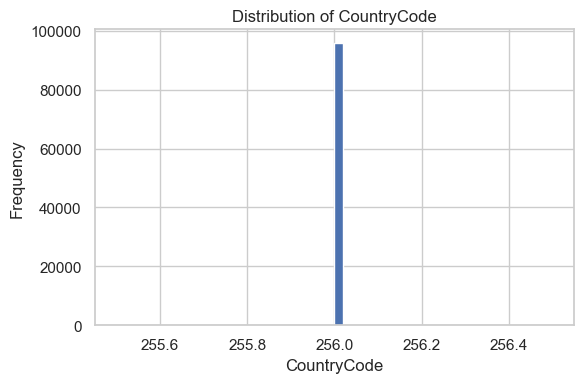

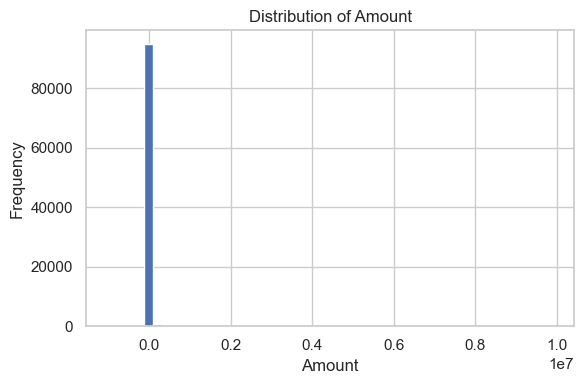

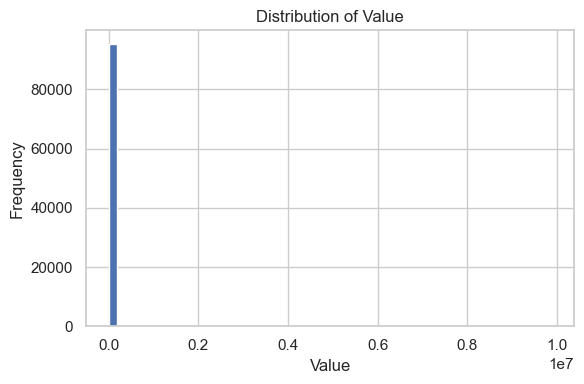

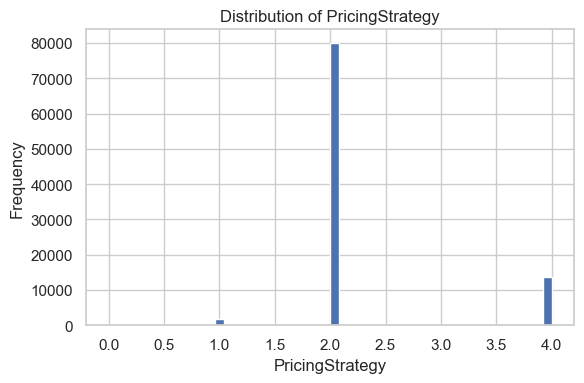

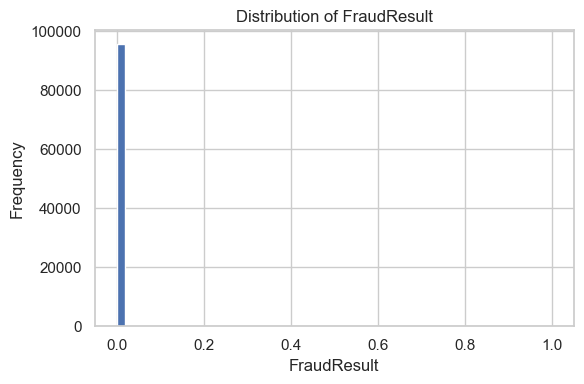

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


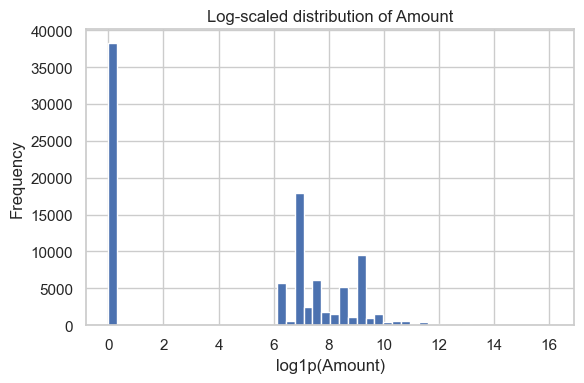

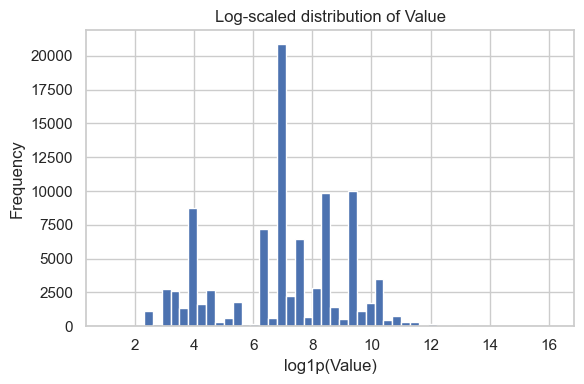

In [10]:
for col in ["Amount", "Value"]:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(np.log1p(df[col].clip(lower=0)).dropna(), bins=50)
        plt.title(f"Log-scaled distribution of {col}")
        plt.xlabel(f"log1p({col})")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


Task 2 point 4: analyze frequency and variability of categories. 

In [11]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols


['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime']

We will plot bar charts for the main categorical variables. For high cardinality columns (like ProductId) it is better to show only the top categories.

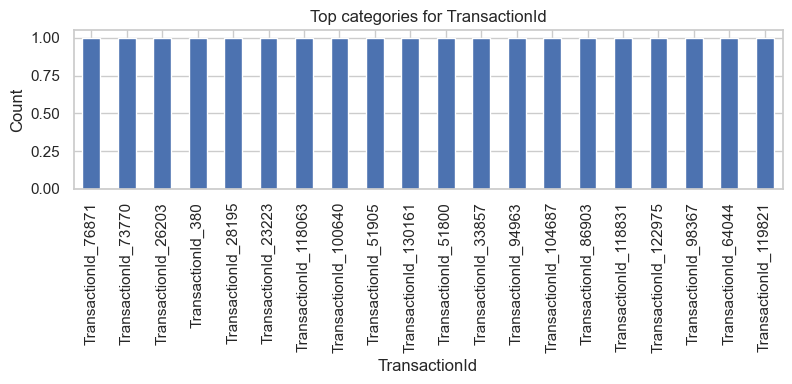

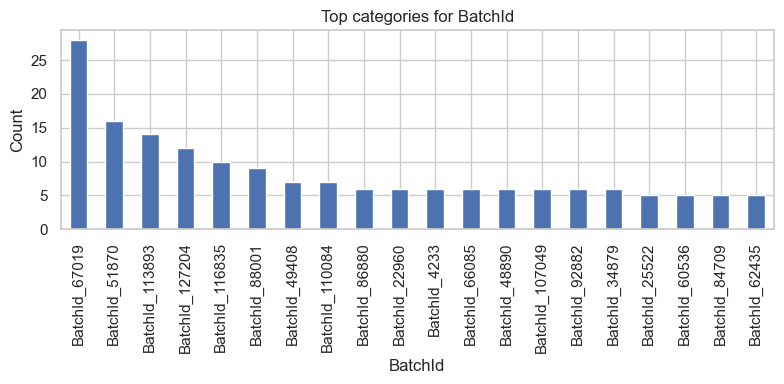

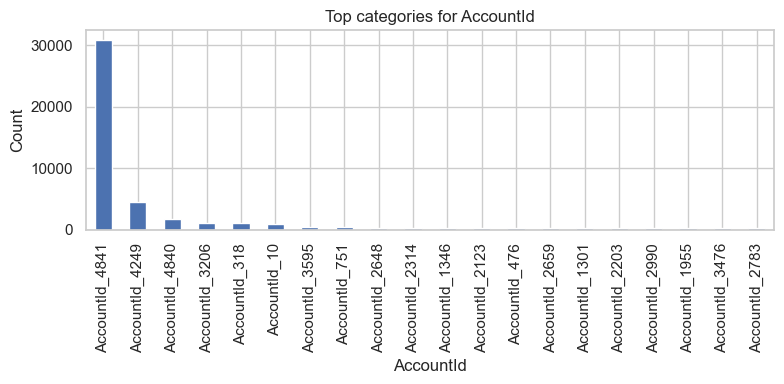

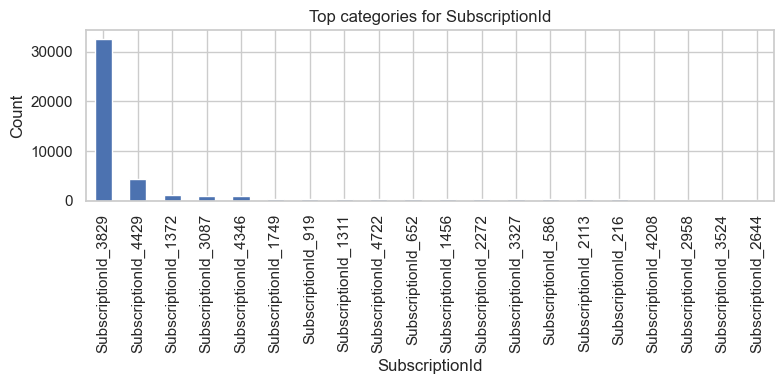

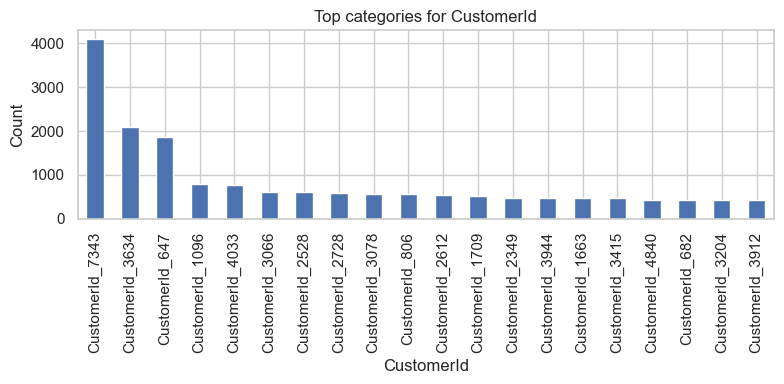

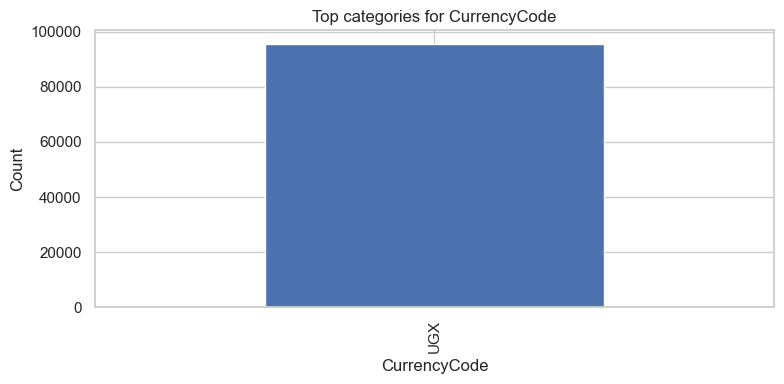

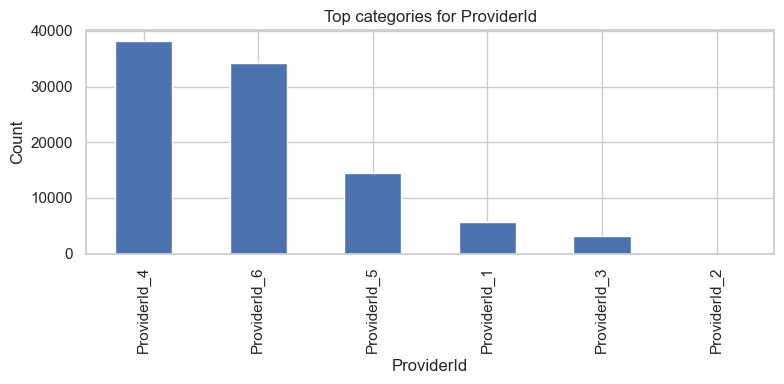

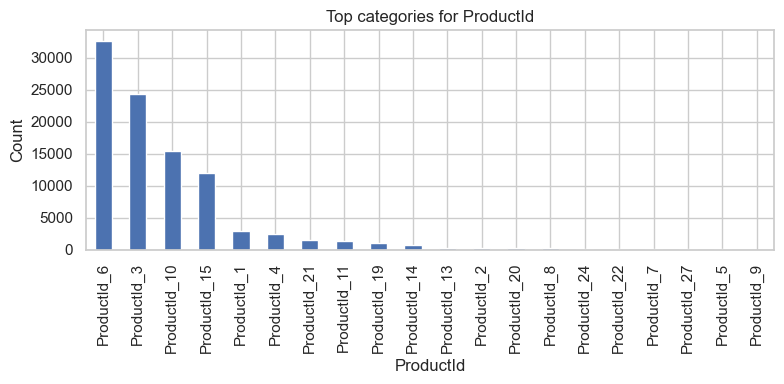

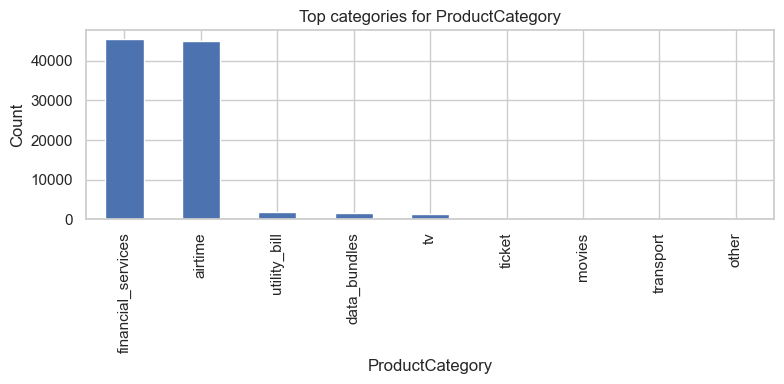

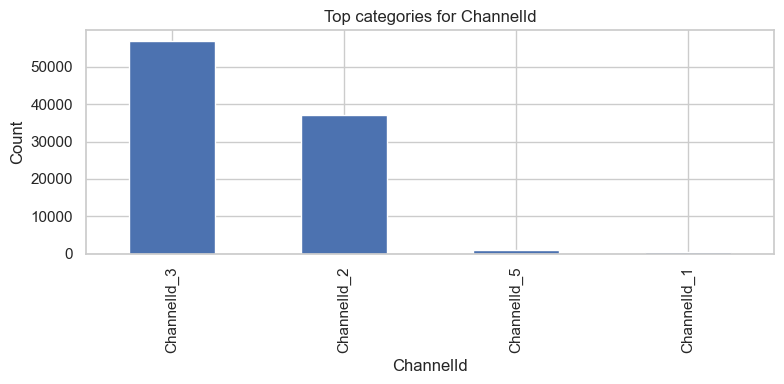

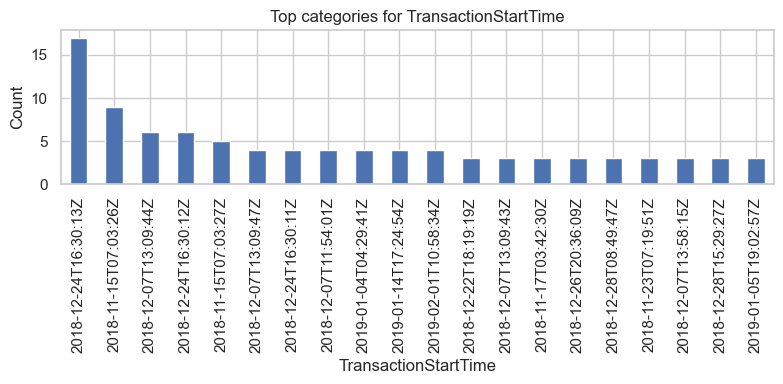

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    value_counts = df[col].value_counts().head(20)  # top 20
    value_counts.plot(kind="bar")
    plt.title(f"Top categories for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
